In [67]:
import numpy as np
from scipy.linalg import cholesky, solve_triangular, cho_solve, cho_factor
from scipy.linalg import solve
from scipy.optimize import minimize

In [78]:
A = np.array([
    [26, 10, 2, 1],
    [10, 14, -5, 1],
    [2, -5, 0, 0],
    [1, 1, 0, 0]])

b = np.array([-1,-1,2,1]).reshape(-1,1)

sol = solve(A, b)

# assing the solution to x1, x2, x3, x4
x1, x2, la, m = sol

# print the solution where x1, x2, x3, x4 are the variables
#round float to 2 decimal places
sol
print("x1 = ", round(x1[0],2))
print("x2 = ", round(x2[0],2))


x1 =  1.0
x2 =  -0.0


In [79]:
def f(x,y):
    return 13*x**2+10*x*y+7*y**2+x+y+2

In [81]:

f(*sol[:2])

array([16.])

Draw graph

In [82]:
# The objective function 
def f(x,y):
    return 13*x**2+10*x*y+7*y**2+x+y+2

# Constraints function 1
def g(x,y):
    return 2*x - 5*y - 2
# Constraints function 2
def h(x,y):
   return x + y - 1

/var/folders/kh/s2d8ky754ks2jgqfq_m95dxm0000gn/T/ipykernel_93254/3026277801.py:7: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


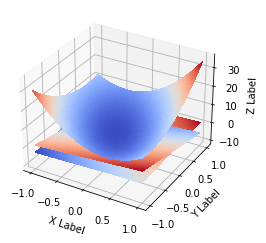

In [83]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure()
ax = fig.gca(projection='3d')


x = np.linspace(-1, 1, 1000)
y = np.linspace(-1, 1, 1000)


X, Y = np.meshgrid(x, y)

Z = f(X,Y)
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                          linewidth=0, antialiased=False)

# draw g
Z1 = g(X,Y)
ax.plot_surface(X, Y, Z1, cmap=cm.coolwarm,
                            linewidth=0, antialiased=False)

# draw h
Z2 = h(X,Y)
ax.plot_surface(X, Y, Z2, cmap=cm.coolwarm,
                            linewidth=0, antialiased=False)

# draw the solution
ax.scatter(*sol[:2], f(*sol[:2]), c='g', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()





/var/folders/kh/s2d8ky754ks2jgqfq_m95dxm0000gn/T/ipykernel_93254/3753508218.py:14: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


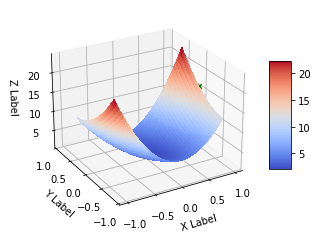

In [84]:

# draw function with constraints

x = np.linspace(-1, 1, 1000)
y = np.linspace(-1, 1, 1000)

X, Y = np.meshgrid(x, y)

Z = f(X,Y)

Z[2*x - 5*y - 2 > 0] = np.nan
Z[x + y - 1 > 0 ] = np.nan

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                          linewidth=0, antialiased=False)

# draw the solution
ax.scatter(*sol[:2], f(*sol[:2]), c='g', marker='x')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.view_init(25, -120)
ax.set_ylim(-1,1)
fig.colorbar(surf, shrink=0.5, aspect=5)

print(Z)
plt.show()

# draw solution with constraints




Using scipy.optimize

In [85]:
def f(x):
    return 13*x[0]**2+10*x[0]*x[1]+7*x[1]**2+x[0]+x[1]+2

In [86]:
cons = ({'type': 'eq',
         'fun' : lambda x: np.array([2*x[0] - 5*x[1] - 2, x[0] + x[1] - 1])})

In [87]:
x0 = np.array([3, 2])

res = minimize(f, x0,constraints=cons)


In [88]:
res.fun

16.00000000000001

In [89]:
res.x

array([1., 0.])